In [4]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams, cm

from scipy import signal
from scipy.signal import stft
from scipy.signal import welch

## Carregamento dos dados para topicos_cc

### Tipos de Movimentos
- Flexão de punho (fechar a mão);
- Extensão de punho (abrir a mão);
- Pinça (segurar objeto pequeno);
- Segurar cartão;
- Segurar caneta;
- Segurar esfera;
- Segurar copo;
- Gancho (segurar objeto com alça).

In [5]:
num_subjects = 10  # quantidade de voluntários
num_trials = 3     # quantidade de tentativas
num_classes = 8    # quantidade de tipos diferentes de movimentos
num_channels = 4   # quantidade de canais/eletrodos
num_samples = 1600 # quantidade de amostras

data = np.empty((num_subjects, num_trials, num_classes, num_channels, num_samples)) # 10,3,8,4,1600

# Carregar os dados para cada pessoa
for subject_id in range(1, num_subjects + 1):
        
    # Carregar os dados das três tentativas
    for trial_id in range(1, num_trials + 1):
        
        file_path = f'./sEMG/datasets/topicos_cc/s{subject_id:02d}_{trial_id}.npy'
        
        loaded_data = np.load(file_path)              # shape (8,1600,4)
        loaded_data = np.moveaxis(loaded_data, 1, -1) # shape (8,4,1600)
        
        data[subject_id - 1, trial_id-1,:, :, :] = loaded_data
                        
print(f'{data.shape} - (voluntarios, classes, ensaios, canais, linhas)')

(10, 3, 8, 4, 1600) - (voluntarios, classes, ensaios, canais, linhas)


## Definição e aplicação do Filtro

In [6]:
def butter_bandpass(data, lowcut, highcut, fs=200, order=4):
    nyq = fs * 0.5
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='bandpass')
    return signal.filtfilt(b, a, data)

filtered_data = butter_bandpass(data, lowcut=5, highcut=50)

data = np.reshape(filtered_data, (num_subjects, num_trials, num_classes, num_channels, num_samples))

## Visualização dos dados

### Mesma classe, diferentes trials

Visualização dos dados em 2d

Para os plots foram considerados quatro voluntário diferentes, são eles: voluntário 3, 6, 7 e 8. Entretanto, apenas uma classe de movimento foi considerada (classe 5). Dessa foram, foram analisados os trial de número 1 ao 3 para cada um dos voluntários supracitados.

**Caso 1: Classe 5, voluntário 7, trials 1 a 3.**

O trial 1 é o que mais se diferencia dos outros trials.

**Caso 2: Classe 5, voluntário 6, trials 1 a 3.**

O trial 2 é o que mais se diferencia dos outros trials.

**Caso 3: Classe 5, voluntário 3, trials 1 a 3.**

O trial 1 é o que mais se diferencia dos outros trials.

**Caso 4: Classe 5, voluntário 8, trials 1 a 3.**

O trial **1 e 2** são os que mais se assemelham.

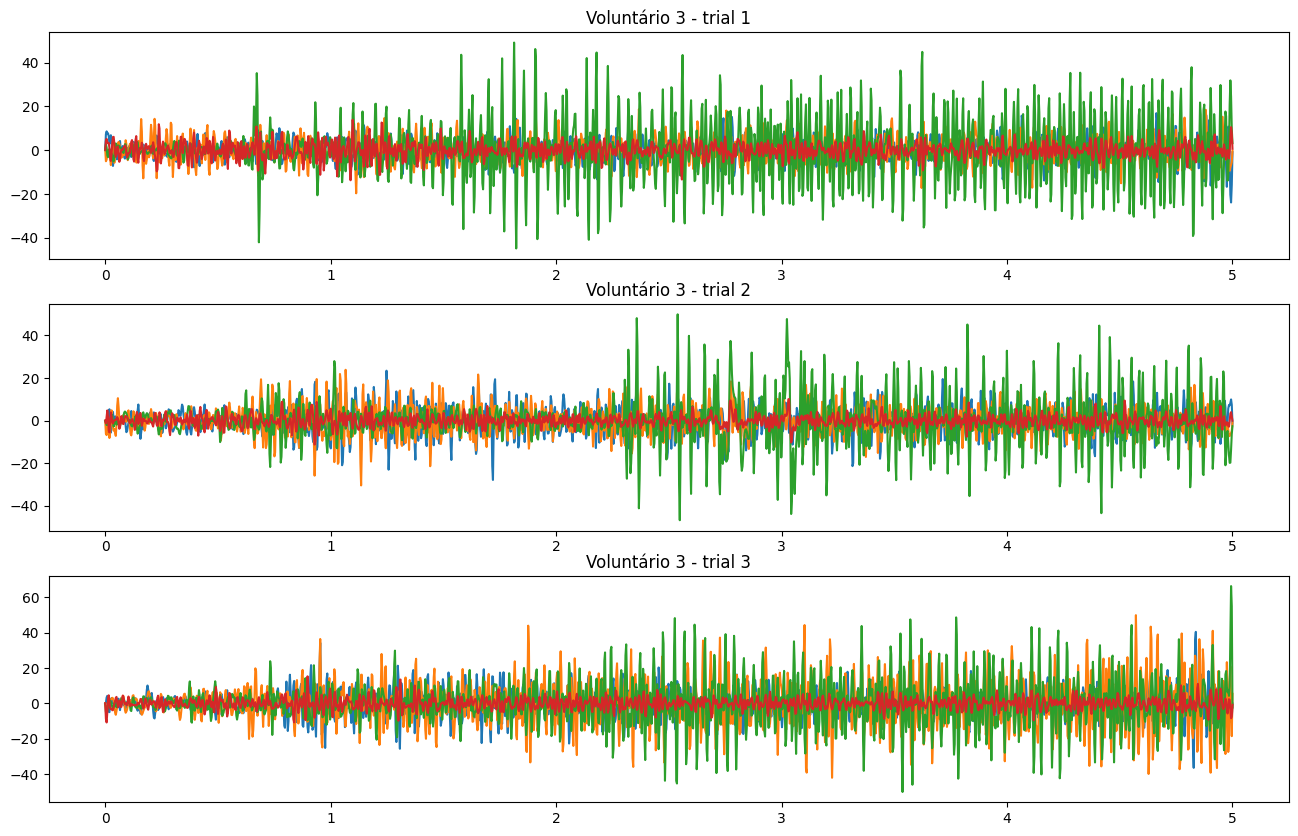

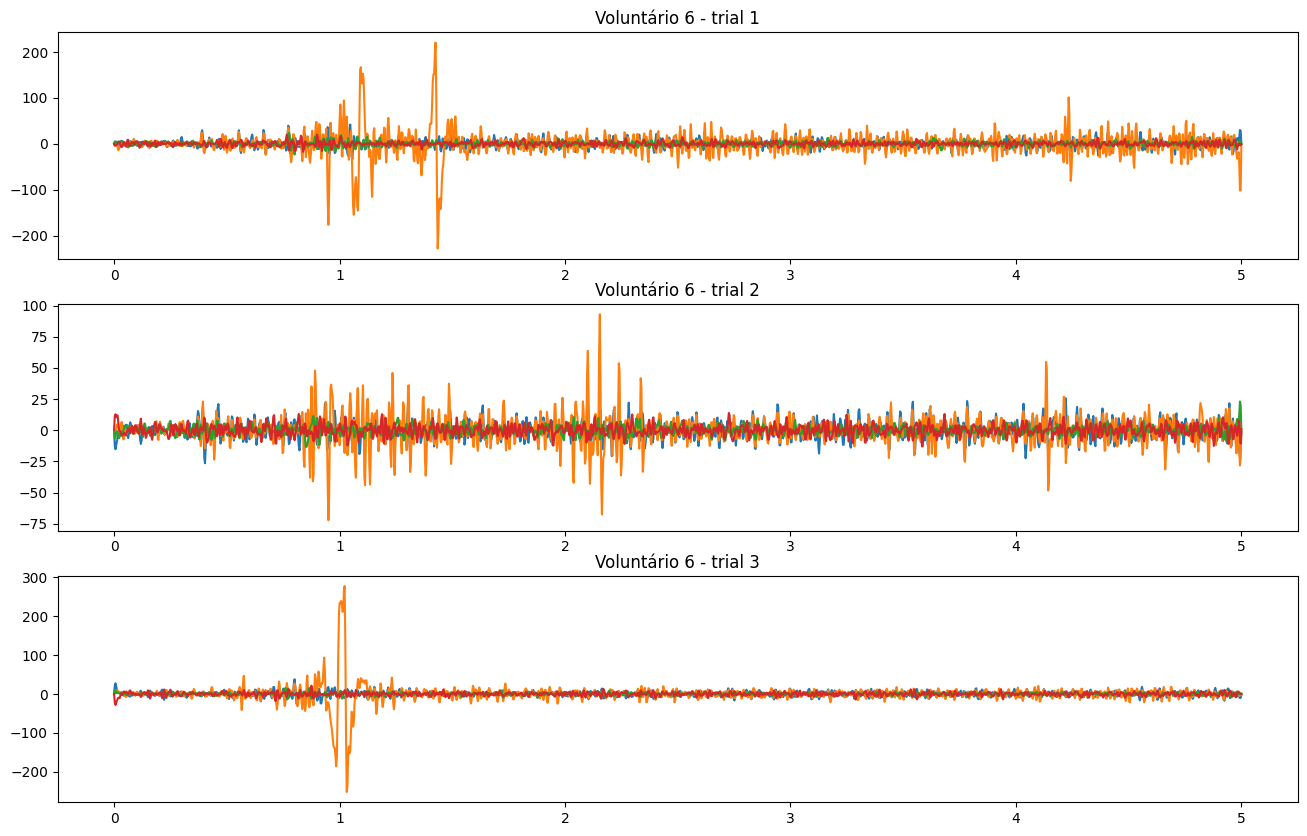

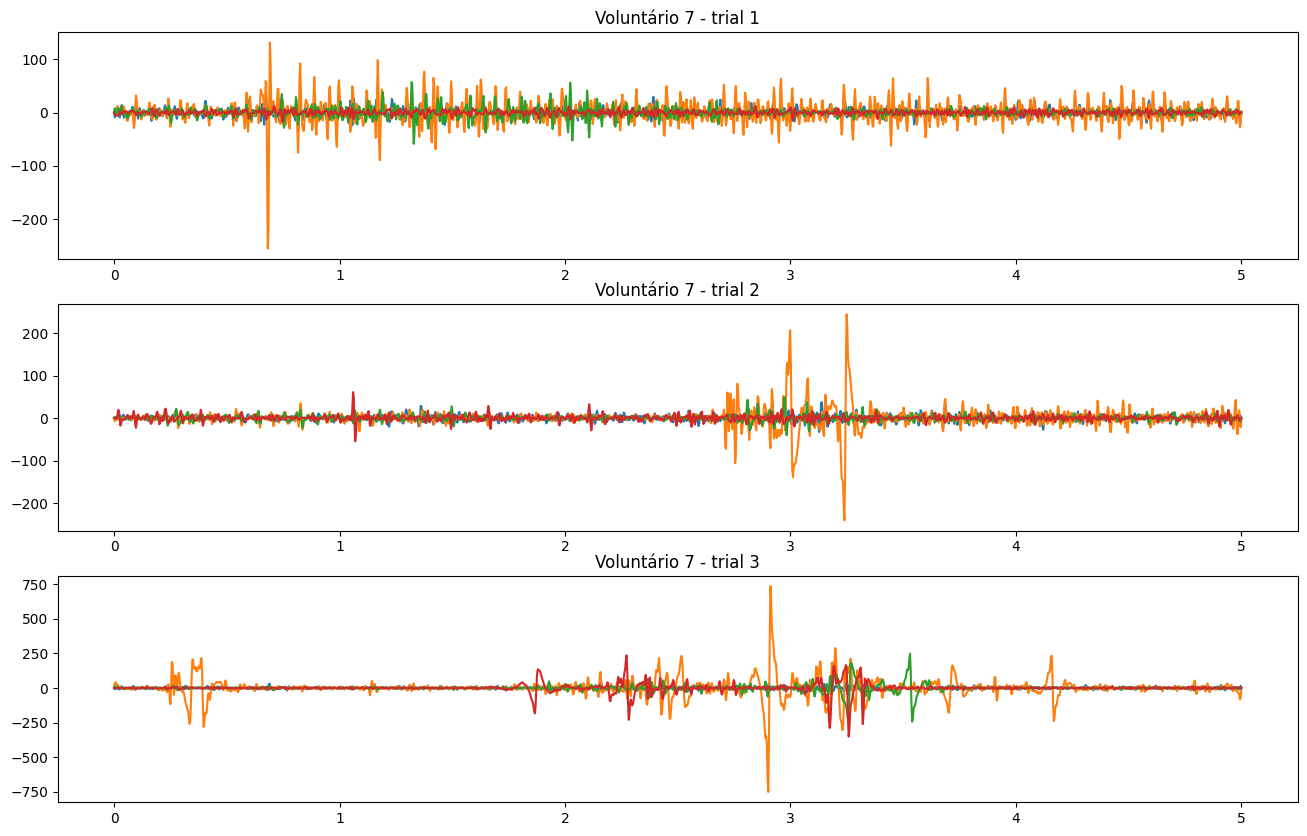

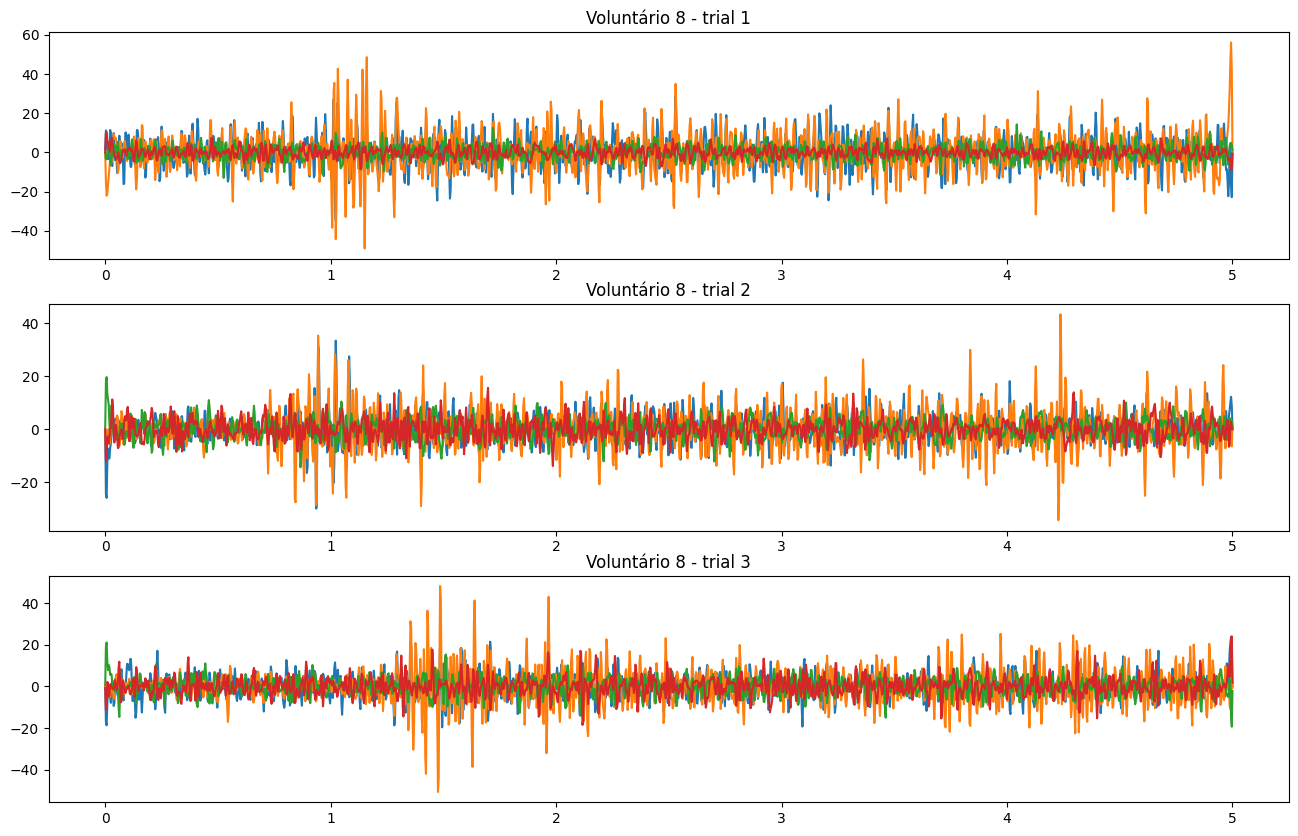

In [7]:
num_voluntarios = [3,6,7,8] # 1...10
classe = 5 # 1...8

for num_voluntario in num_voluntarios:
    
    # trial 1
    d1 = data[num_voluntario - 1,0,classe - 1,0,:], data[num_voluntario - 1,0,classe - 1,1,:], data[num_voluntario - 1,0,classe - 1,2,:], data[num_voluntario - 1,0,classe - 1,3,:]

    # trial 2
    d2 = data[num_voluntario - 1,1,classe - 1,0,:], data[num_voluntario - 1,1,classe - 1,1,:], data[num_voluntario - 1,1,classe - 1,2,:], data[num_voluntario - 1,1,classe - 1,3,:]

    # trial 3
    d3 = data[num_voluntario - 1,2,classe - 1,0,:], data[num_voluntario - 1,2,classe - 1,1,:], data[num_voluntario - 1,2,classe - 1,2,:], data[num_voluntario - 1,2,classe - 1,3,:]

    rcParams['figure.figsize'] = [16., 10.]

    x = np.linspace(0, 5, num_samples)
    fig, ax = plt.subplots(3, 1)

    ax[0].plot(x, d1[0])
    ax[0].plot(x, d1[1])
    ax[0].plot(x, d1[2])
    ax[0].plot(x, d1[3])
    ax[0].set_title('Voluntário {} - trial 1'.format(num_voluntario))

    ax[1].plot(x, d2[0])
    ax[1].plot(x, d2[1])
    ax[1].plot(x, d2[2])
    ax[1].plot(x, d2[3])
    ax[1].set_title('Voluntário {} - trial 2'.format(num_voluntario))

    ax[2].plot(x, d3[0])
    ax[2].plot(x, d3[1])
    ax[2].plot(x, d3[2])
    ax[2].plot(x, d3[3])
    ax[2].set_title('Voluntário {} - trial 3'.format(num_voluntario))

    plt.show()

Visualização dos dados em 3d

Foram considerados os mesmos casos para a visualização em 2d.

Aqui parece se confirmar os casos observados na visualização em 2d. Entretanto, para o Caso 2, os trials 1 e 2 parecem ser mais semelhantes.

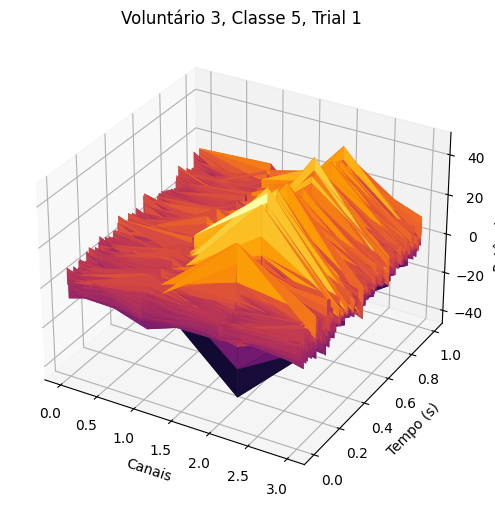

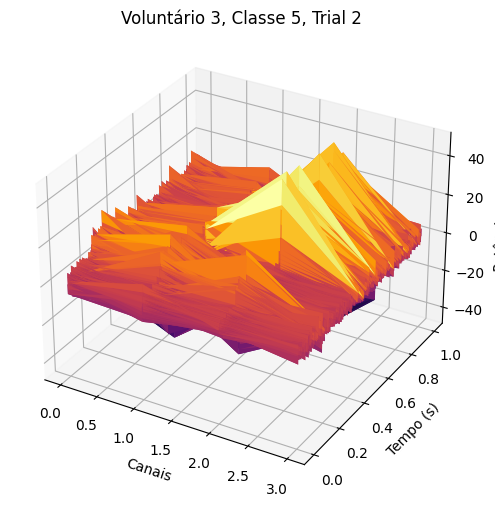

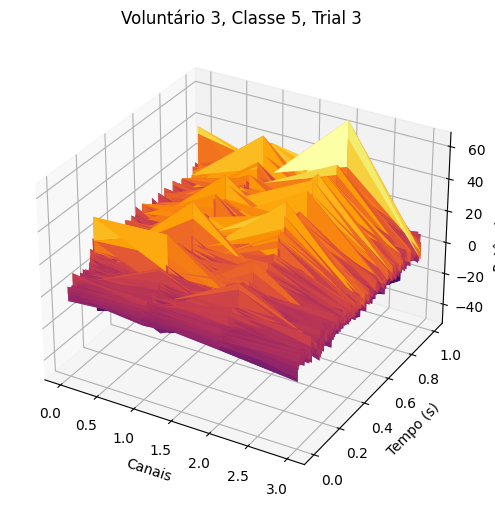

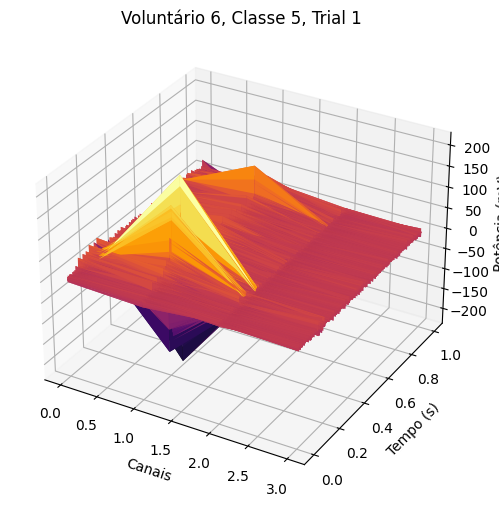

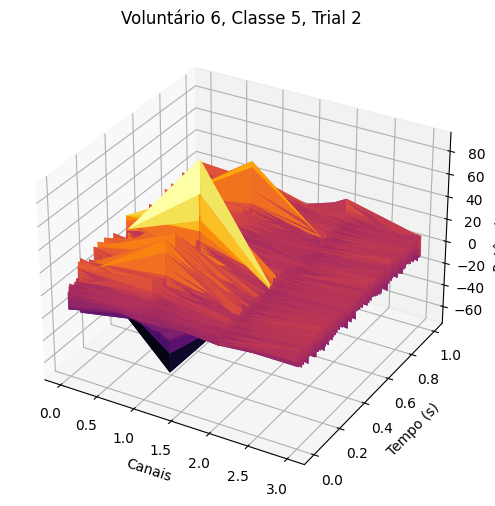

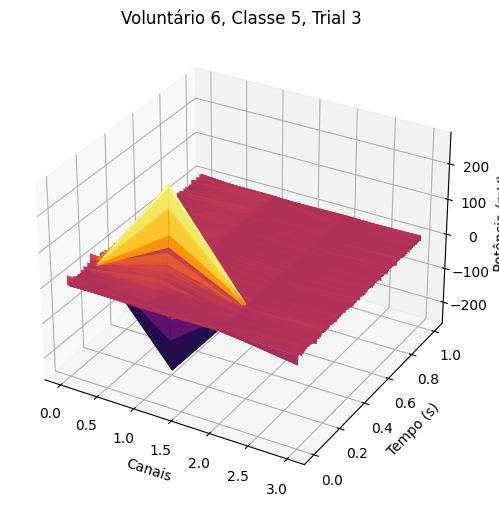

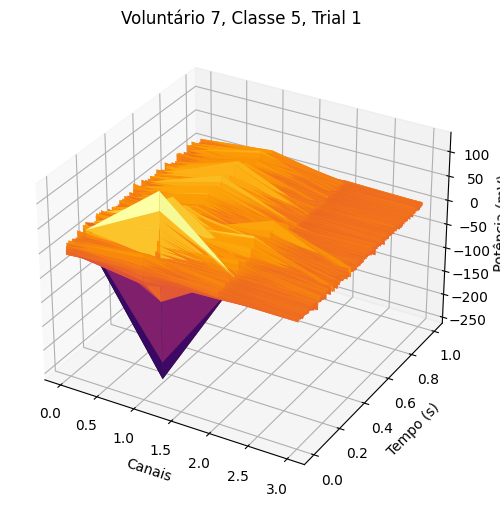

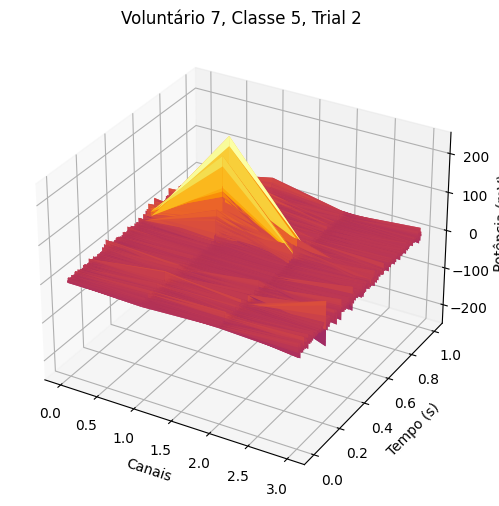

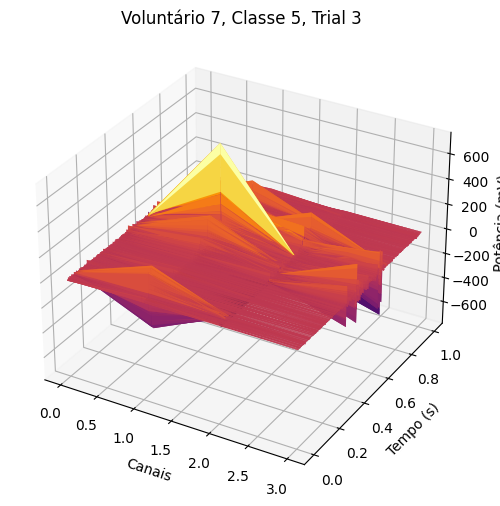

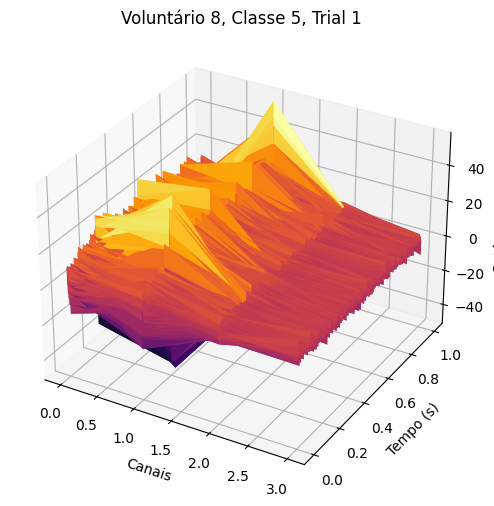

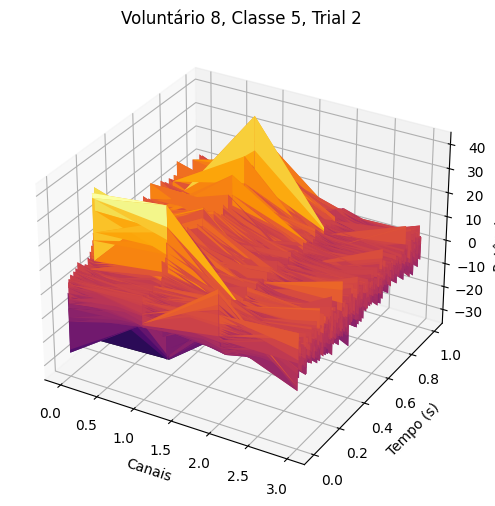

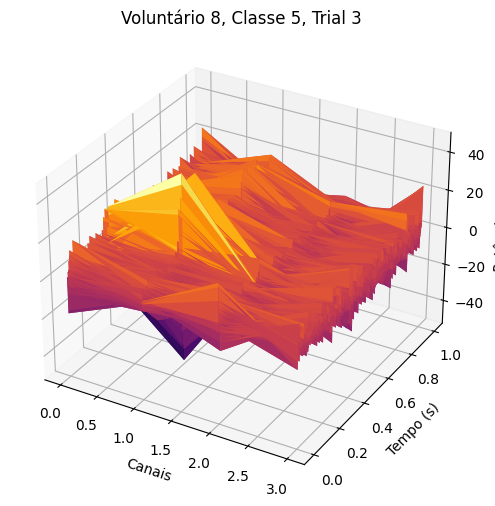

In [8]:
rcParams['figure.figsize'] = [18., 6.]

num_voluntario = [3,6,7,8] # 1...10
num_classe = 5 # 1...8

for num_voluntario in num_voluntarios:
    for trial in range(3):
        plot_data = []
        for channel in range(4):

            # espaço de 1600 pontos entre 0 e 1
            for i, t in enumerate(np.linspace(0, 1, 1600)):
                if i < num_samples: 
                    plot_data.append([channel, t, data[num_voluntario - 1][trial][num_classe - 1][channel][i]])

        plot_data = np.array(plot_data)
        x, y, z = plot_data[:,0], plot_data[:,1], plot_data[:,2] 
        ax = plt.axes(projection ='3d')
        ax.set_title('Voluntário {}, Classe {}, Trial {}'.format(num_voluntario, num_classe, trial + 1))
        ax.set_xlabel('Canais')
        ax.set_ylabel('Tempo (s)')
        ax.set_zlabel('Potência (mV)')
        ax.plot_trisurf(x, y, z, antialiased=True, cmap=cm.inferno, linewidth=1)
        plt.show()

### Diferentes classes, mesmo trials

Visualização dos dados em 2d

Para os plots foram considerados quatro voluntário diferentes, são eles: voluntário 3, 6, 7 e 8. As classes de movimentos consideradas foram as classes de número 1, 2, 3, 4, 5, 7 e 8. Sendo que, para cada visualização foram consideradas 3 classes de movimentos. Foi utilizado apenas o trial de número 2.

**Caso 1: classes 1,5 e 8, voluntário 7, trial 2**

As classes 1 e 8 obtiveram resultados parecidos. A visualização das 3 classes foram bastante distintas.

**Caso 2: classes 2,4 e 8, voluntário 6, trial 2**

Para o segundo exemplo foram consideradas as classes **2**, **4** e **8** do voluntário 6 e foi considerado o trial de número **2**. A classe 2 e 8 são um pouco parecidas.

**Caso 3: classes 1,5 e 8, voluntário 3, trial 2**

Para o terceiro exemplo foram consideradas as classes **1**, **5** e **8** do voluntário 3 e foi considerado o trial de número **2**. A visualização das 3 classes foram bem distintas.

**Caso 4: classes 2,3 e 4, voluntário 8, trial 2**

Por fim, foi utilizado as classes **2**, **3** e **4** do voluntário **8** e foi considerado o trial de número **2**. É importante ressaltar que as classes 3 e 4 obtiveram resultados bem parecidos, sendo que a classe 2 foi a que mais se diferenciou. 

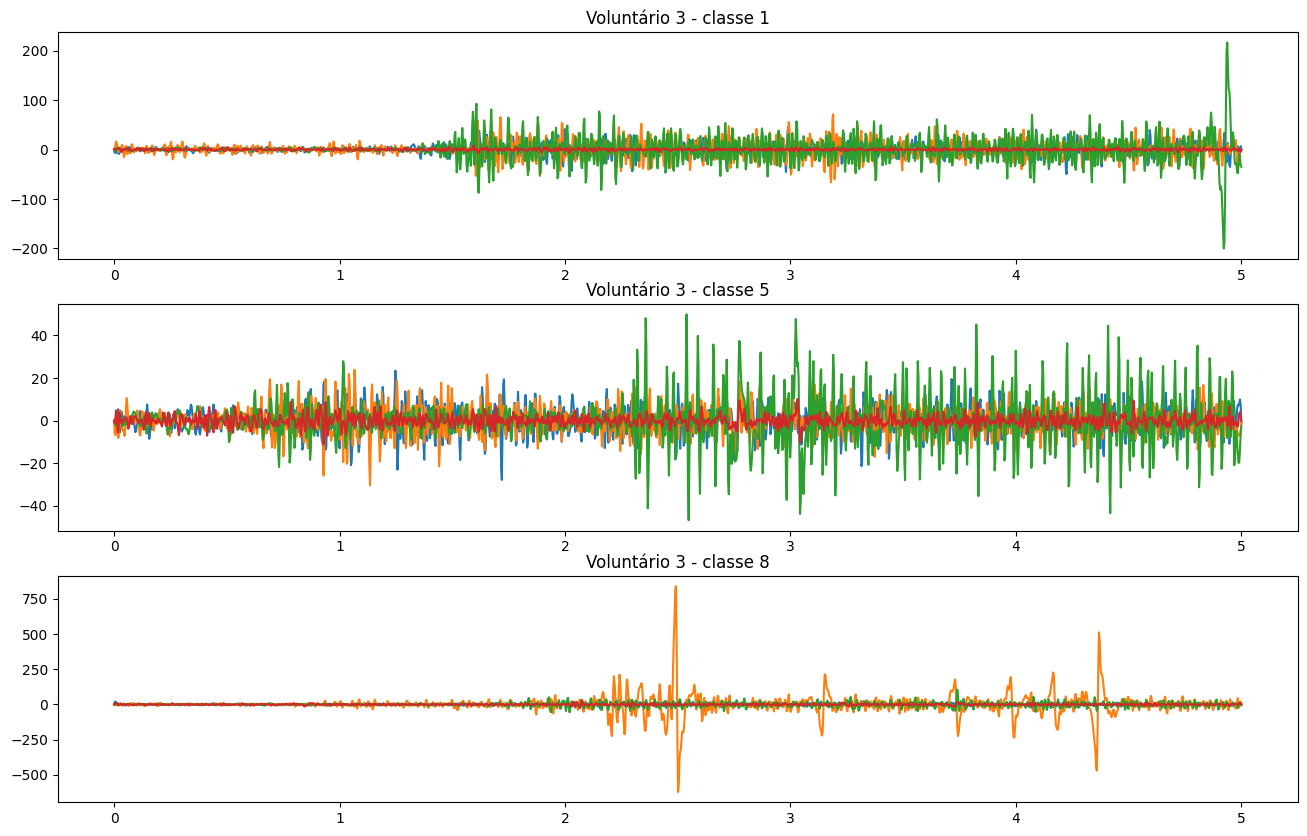

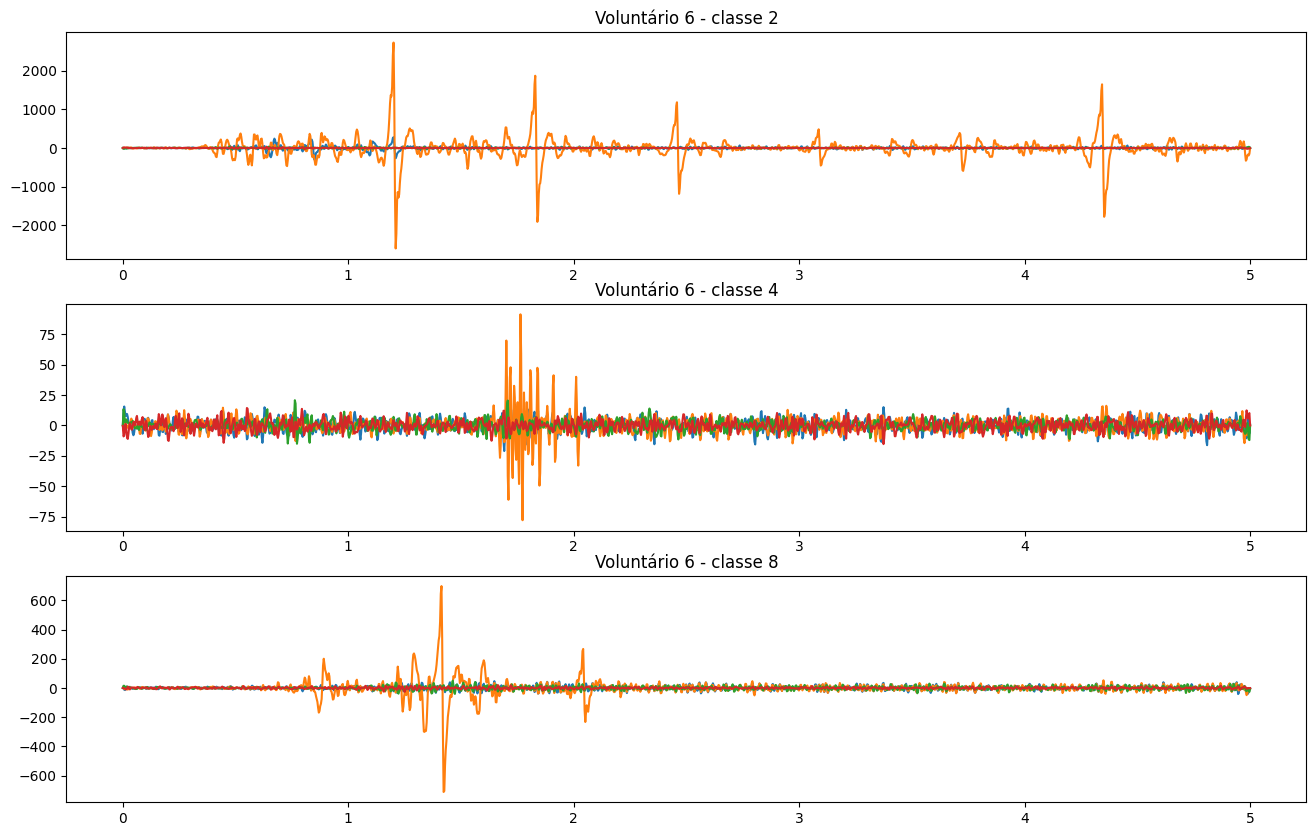

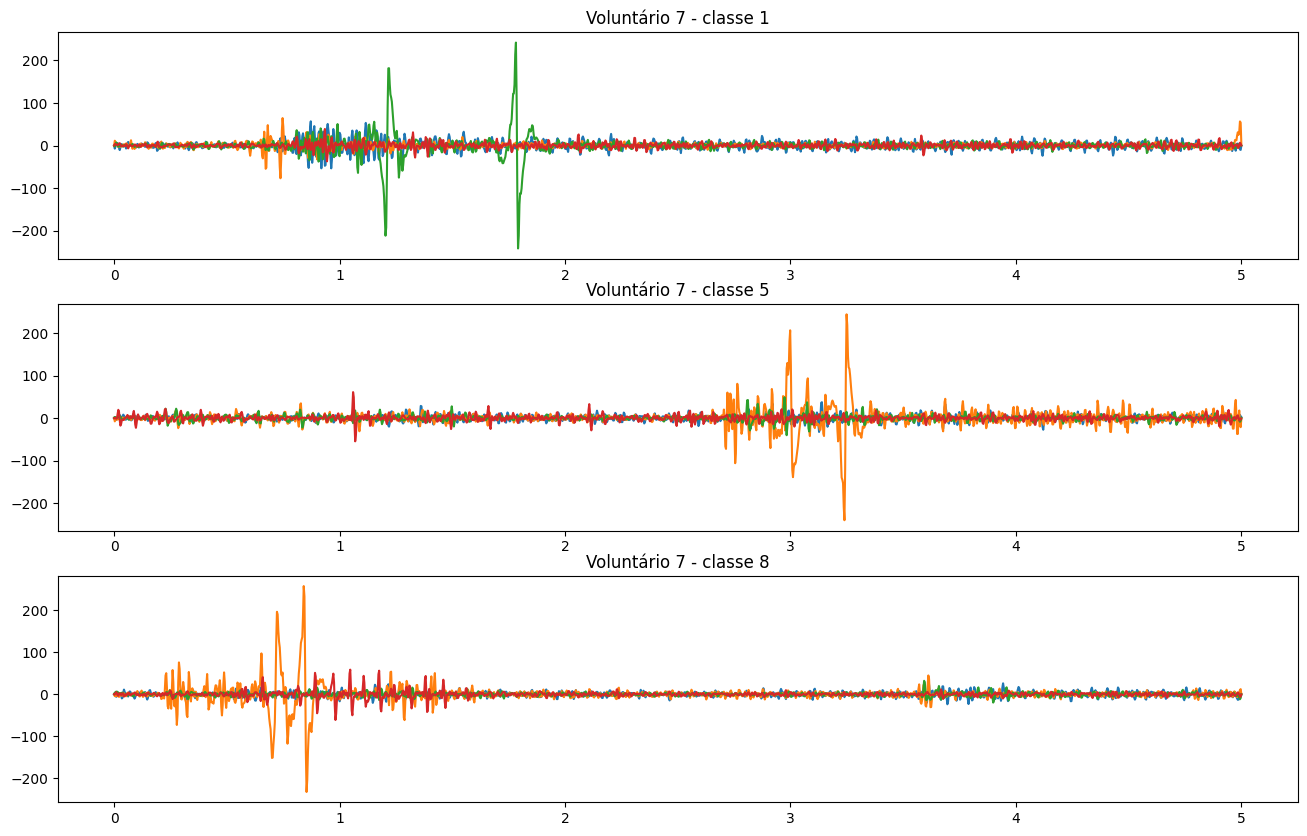

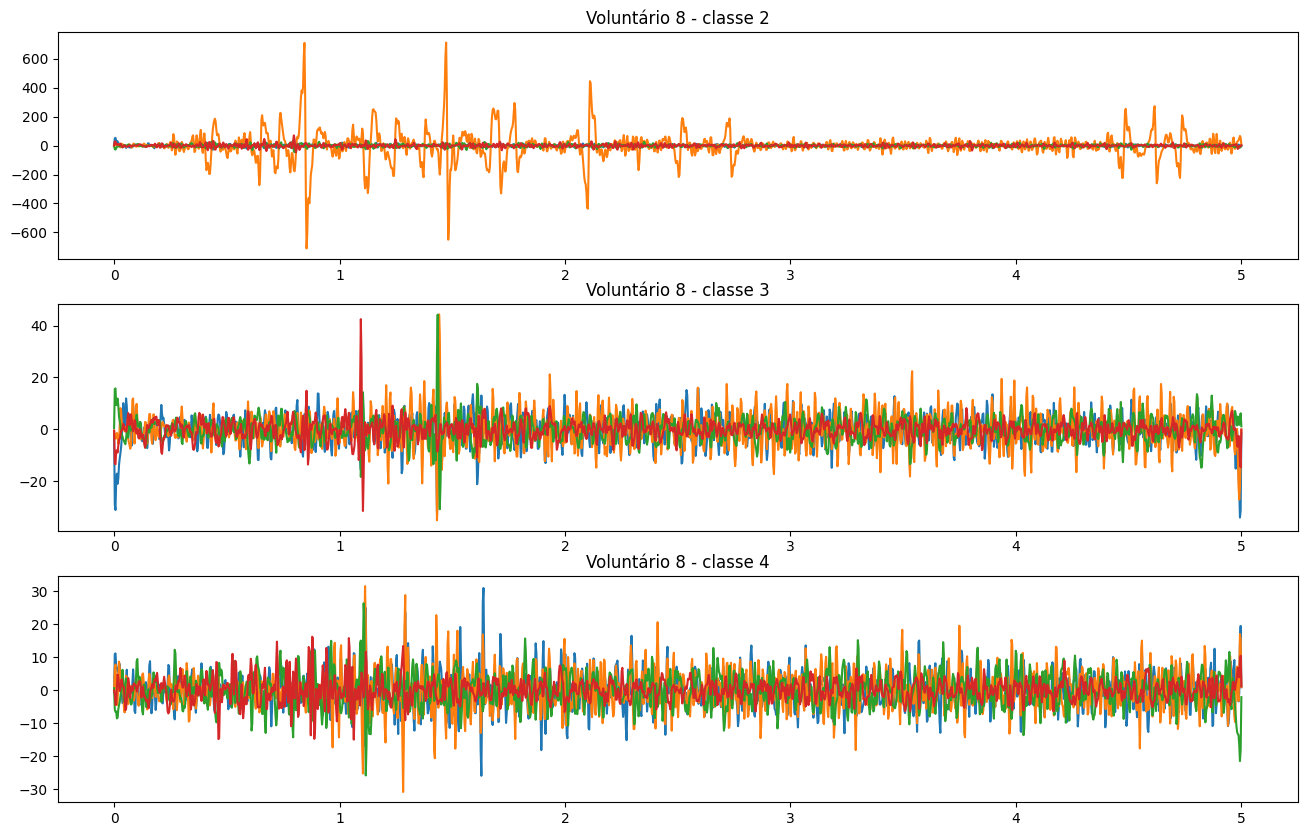

In [9]:
num_voluntarios = [3,6,7,8] # 1...10
trial = 2 # 1...3

classes = [[1,5,8],[2,4,8],[1,5,8],[2,3,4]]

for i, num_voluntario in enumerate(num_voluntarios):
    num_classe_1 = classes[i][0] # 1...8
    num_classe_2 = classes[i][1] # 1...8
    num_classe_3 = classes[i][2] # 1...8

    d1 = data[num_voluntario - 1,trial - 1,num_classe_1 - 1,0,:], data[num_voluntario - 1,trial - 1,num_classe_1 - 1,1,:], data[num_voluntario - 1,trial - 1,num_classe_1 - 1,2,:], data[num_voluntario - 1,trial - 1,num_classe_1 - 1,3,:]

    d2 = data[num_voluntario - 1,trial - 1,num_classe_2 - 1,0,:], data[num_voluntario - 1,trial - 1,num_classe_2 - 1,1,:], data[num_voluntario - 1,trial - 1,num_classe_2 - 1,2,:], data[num_voluntario - 1,trial - 1,num_classe_2 - 1,3,:]

    d3 = data[num_voluntario - 1,trial - 1,num_classe_3 - 1,0,:], data[num_voluntario - 1,trial - 1,num_classe_3 - 1,1,:], data[num_voluntario - 1,trial - 1,num_classe_3 - 1,2,:], data[num_voluntario - 1,trial - 1,num_classe_3 - 1,3,:]

    rcParams['figure.figsize'] = [16., 10.]

    x = np.linspace(0, 5, num_samples)
    fig, ax = plt.subplots(3, 1)

    ax[0].plot(x, d1[0])
    ax[0].plot(x, d1[1])
    ax[0].plot(x, d1[2])
    ax[0].plot(x, d1[3])
    ax[0].set_title('Voluntário {} - classe {}'.format(num_voluntario, num_classe_1))

    ax[1].plot(x, d2[0])
    ax[1].plot(x, d2[1])
    ax[1].plot(x, d2[2])
    ax[1].plot(x, d2[3])
    ax[1].set_title('Voluntário {} - classe {}'.format(num_voluntario, num_classe_2))
    
    ax[2].plot(x, d3[0])
    ax[2].plot(x, d3[1])
    ax[2].plot(x, d3[2])
    ax[2].plot(x, d3[3])
    ax[2].set_title('Voluntário {} - classe {}'.format(num_voluntario, num_classe_3))

    plt.show()

Visualização dos dados em 3d

Para esse exemplo foi passado o trial **1** de todas as classes do voluntário **7**. As classes 6, 7 e 8 ficaram parecidas.

Para o voluntário **6**, as classes 6 e 7 obtiveram resultados parecidos.

Para os voluntário **3 e 8**, as classes parecem ter se diferenciado bastante nas visualizações.

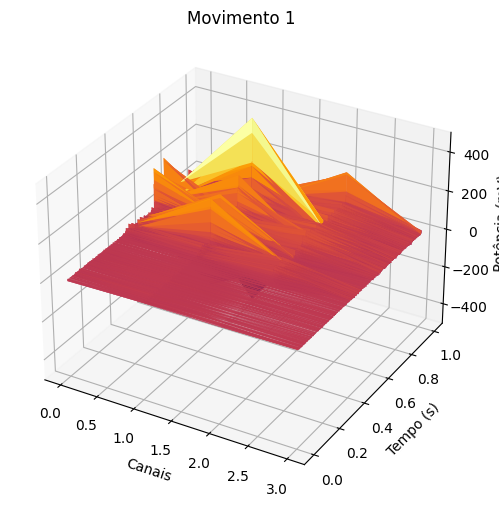

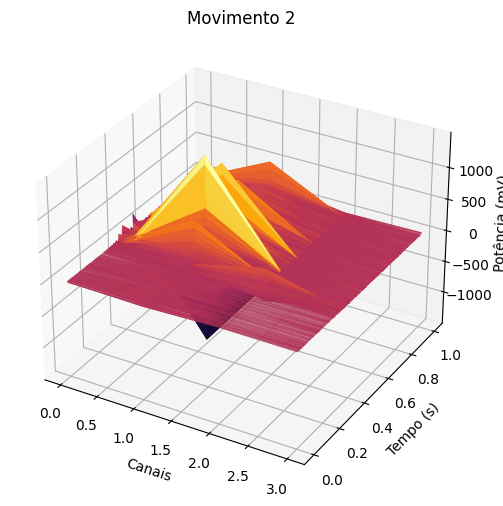

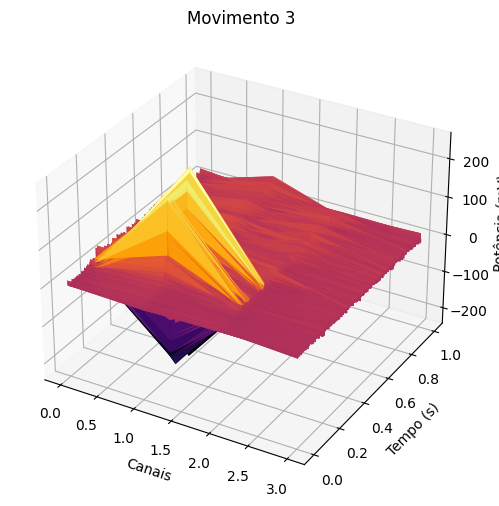

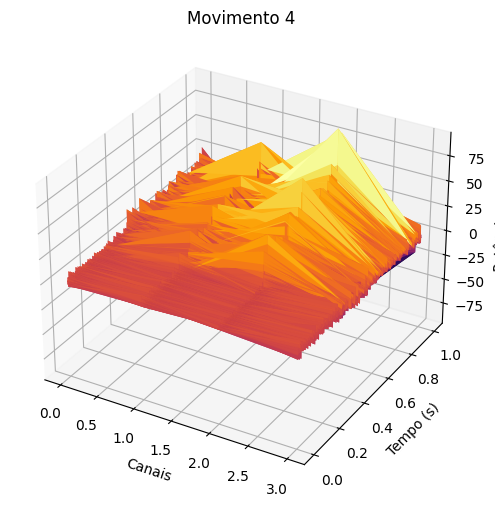

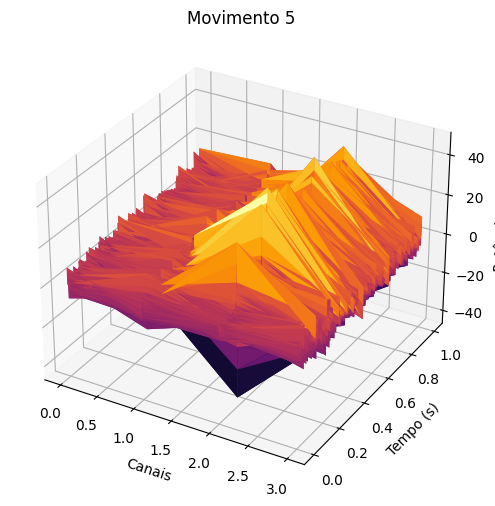

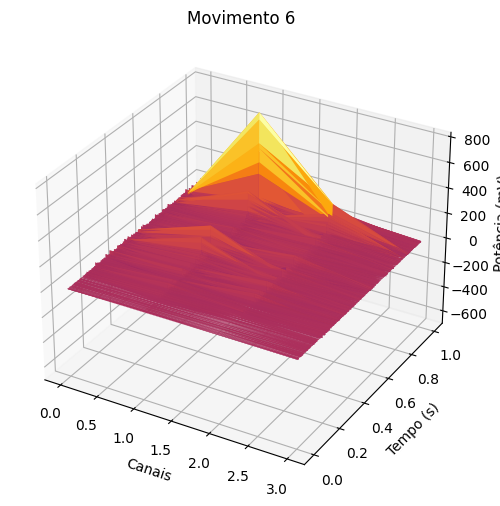

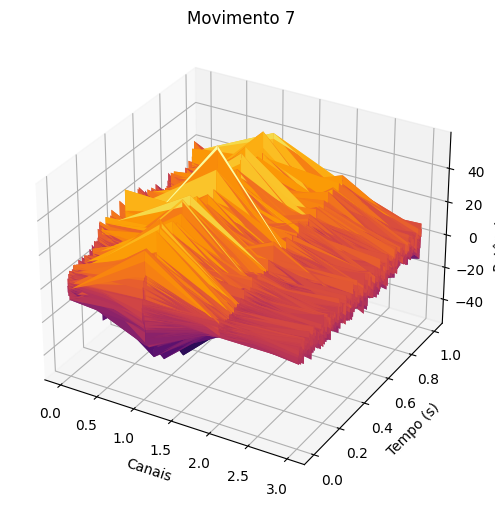

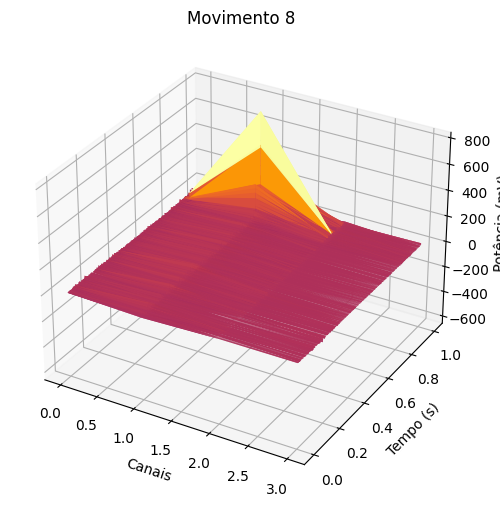

In [10]:
rcParams['figure.figsize'] = [18., 6.]

num_voluntario = 3
trial = 1 

for mov in range(8):
    plot_data = []
    for channel in range(4):
        
        # espaço de 1600 pontos entre 0 e 1
        for i, t in enumerate(np.linspace(0, 1, 1600)):
            if i < num_samples: 
                plot_data.append([channel, t, data[num_voluntario - 1][trial - 1][mov][channel][i]])
            
    plot_data = np.array(plot_data)
    x, y, z = plot_data[:,0], plot_data[:,1], plot_data[:,2]
    ax = plt.axes(projection ='3d')
    ax.set_title('Movimento {}'.format(mov + 1))
    ax.set_xlabel('Canais')
    ax.set_ylabel('Tempo (s)')
    ax.set_zlabel('Potência (mV)')
    ax.plot_trisurf(x, y, z, antialiased=True, cmap=cm.inferno, linewidth=1)
    plt.show()

### Preprocessamento
O objetivo é definir um step que alcance um resultado de janelas semelhantes entre o domínio do tempo e o domínio da frequência.

In [11]:
step = 47 # é o passo de deslocamento entre as janelas consecutivas
segment = 64 # define o tamanho da janela no domínio do tempo

data = data.reshape(num_subjects, num_trials * num_classes, num_channels, num_samples) # (10, 24, 4, 1600)

n_win = int((data.shape[-1] - segment) / step) + 1 # 33
ids = np.arange(n_win) * step

# Janelas do dado no dominio do tempo
chunks_time = np.array([data[:, :, :, k:(k + segment)] for k in ids]).transpose(1, 2, 3, 0, 4)

# Janelas do dado no domínio da frequência
_, _, chunks_freq = stft(data, fs=200, nperseg=64, noverlap=32)

print('Formato (shape) dos dados depois da divisão de janelas')
print(f'Dominio do tempo: {chunks_time.shape} - (voluntario, classes+ensaios, canais, janelas, linhas)')
print(f'Dominio da frequência:  {chunks_freq.shape} - (voluntario, classes+ensaios, canais, janelas, linhas)')

Formato (shape) dos dados depois da divisão de janelas
Dominio do tempo: (10, 24, 4, 33, 64) - (voluntario, classes+ensaios, canais, janelas, linhas)
Dominio da frequência:  (10, 24, 4, 33, 51) - (voluntario, classes+ensaios, canais, janelas, linhas)


Obter os dados no domínio da frequência pelo método Welch, casando também o tamanho da dimensionalidade até o número de janelas.

In [12]:
# Calcula o espectrograma usando o método de Welch   
f, Pxx = welch(data, fs=200, nperseg=64, noverlap=32)

print('Formato (shape) dos dados no domínio da frequência usando o método Welch:')           
print(f'Domínio da frequência: {Pxx.shape} - (voluntário, classes+ensaios, canais, janelas)')

Formato (shape) dos dados no domínio da frequência usando o método Welch:
Domínio da frequência: (10, 24, 4, 33) - (voluntário, classes+ensaios, canais, janelas)


## Features

Definição das funções de extração de características.

In [14]:
from math import prod

sample_rate = 200

# funções auxiliares
def PSD(w):
    ''' definição da função PSD para o sinal no domínio da frequência '''
    return np.abs(w) ** 2


# funções de extração de características

# Domínio do Tempo
def wamp(x, threshold=0):
    result = 0
    N = x.shape[-1]

    for i in range(0, N-1):
        diff = np.abs(x[:,:,:,:, i+1] - x[:,:,:,:, i])
        result += np.where(diff > threshold, 1, 0)  

    return result

def wl(x):
    result = 0
    N = x.shape[-1]

    for i in range(0,N-1):
        result += np.abs(x[:, :, :, :, i] - x[:, :, :, :, i+1])
    
    return result

def var(x):
    return np.sum(x ** 2, axis=-1) / (np.prod(x.shape) - 1)

def rms(x):
    return np.sqrt(np.sum(np.abs(x) ** 2, axis=-1) / (np.prod(x.shape) - 1))

def zc(x):
    N = x.shape[-1]
    result = 0
    
    for i in range(N-1):
        result += np.where(x[:,:,:,:,i] * x[:,:,:,:,i+1] <= 0, 1, 0)
    
    return result

## Domínio da Frequência

# def log_det(x):
#     from math import e
#     return e ** (np.sum(np.log10(np.abs(x)), axis=-1) /  np.prod(x.shape))

def fmd(w):
    return np.sum(PSD(w), axis=-1) / 2

# Função auxiliar para fmn
def fj(M, j):
    return j * sample_rate / 2 * M

def fmn(w):
    result = 0
    M = w.shape[-1]
    
    for j in range(0,M):
        result += fj(M, j) * PSD(w[:,:,:,:,j]) / PSD(w[:,:,:,:,j])
        
    return result

def mmdf(w):
    return np.sum(np.abs(w), axis=-1) / 2

def mmnf(w):
    result = 0
    
    M = w.shape[-1]
    
    for j in range(0,M):
        result += fj(M, j) * w[:,:,:,:,j] / w[:,:,:,:,j]
        
    return result

In [45]:
final_data = list()

final_data.append(var(chunks_time))
final_data.append(wamp(chunks_time))
final_data.append(wl(chunks_time))
final_data.append(rms(chunks_time))
final_data.append(zc(chunks_time))

# Função implementadas por outros alunos (desconsiderar)
# final_data.append(log_det(chunks_time))

# Adiciona características no domínio da frequencia
final_data.append(fmd(chunks_freq))
final_data.append(fmn(chunks_freq))
final_data.append(mmdf(chunks_freq))
final_data.append(mmnf(chunks_freq))

# Adiciona resultado (característica) do Welch 
final_data.append(Pxx)
final = np.array(final_data)

final_reshaped = final.transpose((1, 0, 3, 2, 4))

dim1 = final_reshaped.shape[1]
dim2 = final_reshaped.shape[2]
final_concatenated = final_reshaped.reshape((10, dim1 * dim2, 24, 33))

dim3 = final_concatenated.shape[2]
dim4 = final_concatenated.shape[3]
final_concatenated = final_concatenated.reshape((10, dim1 * dim2, dim3 * dim4))

print(final_concatenated.shape, "(Voluntários, Características * canais, classes + ensaios * janelas)")

# itera sobre cada um dos voluntarios
for i in range(final_concatenated.shape[0]):  
    # Salvar o conteúdo do voluntário em um arquivo
    # cada um dos arquivos terá o shape (40, 792)
    np.save(f'resultados_voluntario_{i+1}.npy', final_concatenated[i, :, :]) 

(10, 40, 792) (Voluntários, Características * canais, classes + ensaios * janelas)
